## Plotting with seaborn

Seaborn can be used to create statistical plots from DataFrames.

Seaborn maps columns of the DataFrame to plot aesthetics.

A single plot might have aesthetics like 
- `x` 
- `y`
- `hue` (color)
- `size` (marker size)
- `style`. 


	
Basic intro: https://seaborn.pydata.org/tutorial/introduction.html


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's use the tips data set as an example. It provides information about how much people have tipped when visiting a restaurant.

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Visualizing statistical relationships (relational)
https://seaborn.pydata.org/tutorial/relational.html

Two visualize statistical realtionships between two variables on can use 
a `scatterplot` or a `lineplot`. These plots have aesthetics 

- `x`
- `y`
- `hue`
- `style`
- `size`

and create a single plot (axis).

Note that the mapping is done automatically. If we use `hue = "sex"` the values in the sex column are automatically transformed into colors.

<Axes: xlabel='total_bill', ylabel='tip'>

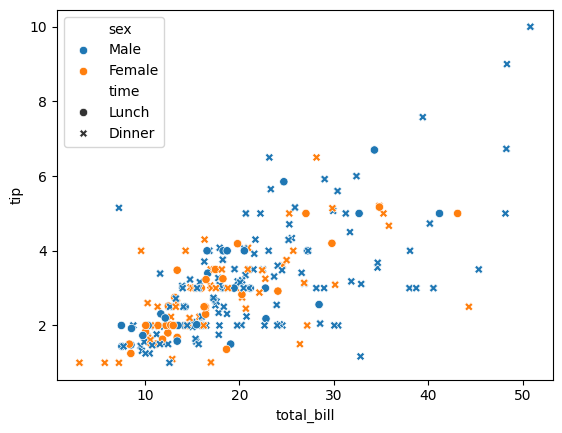

In [26]:
sns.scatterplot(x="total_bill", y="tip", hue = "sex", style = "time", data=tips)


If one wants to create a whole grid of plots, one can use a so-called Figure plot instead.
A Figure plot also allows to assign aesthetics to specify position in the plot grid

- `col`: columns in the plot grid
- `row`: rows in the plot grid
- `col_wrap`: do not specify `row` but indicate how many columns the plot should have


`relplot` is either a `scatterplot` (`kind = 'scatter'`, default) or a
`lineplot`, (`kind = 'line'`).


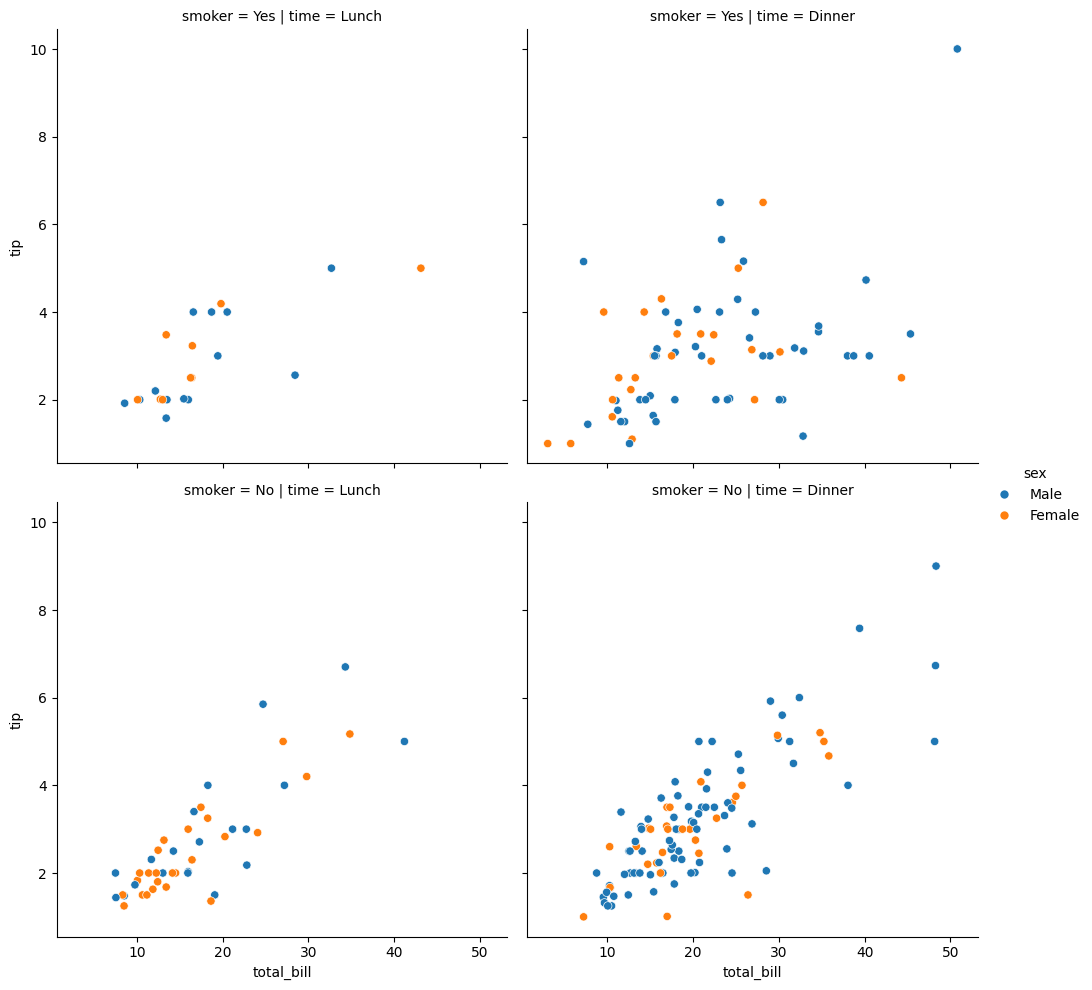

In [23]:
sns.relplot(x="total_bill", y="tip", hue = "sex", col = "time", row = "smoker", data=tips, kind = 'scatter')

In line plots, assignment of aesthetics also affects the grouping (i.e. doing `hue = 'sex'` will draw separate lines for each `sex`).

If multiple values are available for the same `x`, seaborn automatically aggregates and shows the mean and 95% confidence interval.

Behaviour can be changed by setting
- `errorbar = None`: do not show confidence intervals
- `errorbar = 'sd'`: show +/- one standard deviation errorbars
- `errorbar = 'se'`: show +/- one standard error
- `errorbar = ('pi', 0.95)`: show 95% percentiles
- `errorbar = ('ci', 0.95)`: show 95% confidence intervals

<Axes: xlabel='day', ylabel='tip'>

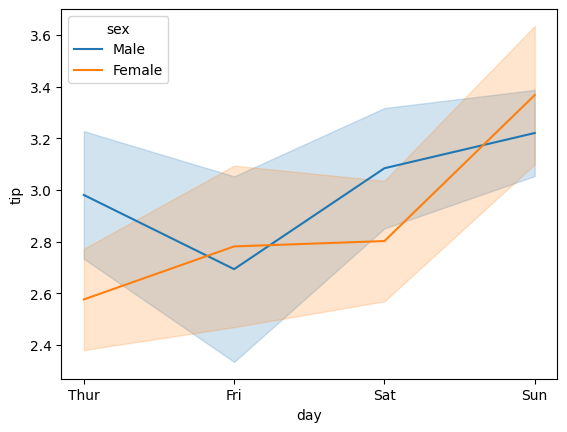

In [41]:
sns.lineplot(x="day", y="tip", hue = "sex", errorbar = 'se', data=tips)

### Visualizing distributions of data (distributional)
https://seaborn.pydata.org/tutorial/distributions.html

Figure plot is `displot`, which is either `histplot`, `kdeplot`, `ecdfplot`, or `rugplot`.

#### univariate histograms

Univariate histograms can be created with `histplot` for a single axis or `displot(..., kind = 'hist')` for a plot grid.

Number of bins can be set using `bins`, or bin width using `binwidth`

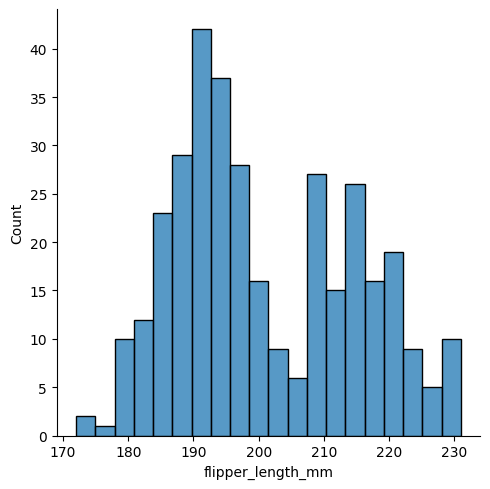

In [43]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm", binwidth = 3)

To condition on other variables one can assign aesthetics, e.g.  `hue = 'kind'`.
The way the bars are arranged can be specified using`multiple`: `'layer'`, `'stack'`, or `'dodge'`

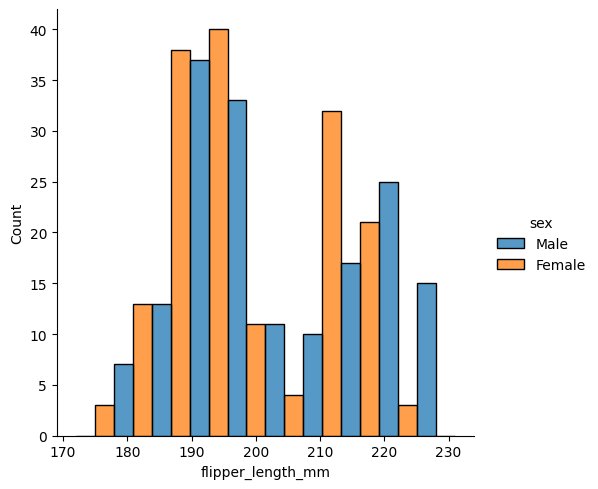

In [49]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Instead of a histogram one can also plot a kernel density estimate by using `kind = "kde"`.

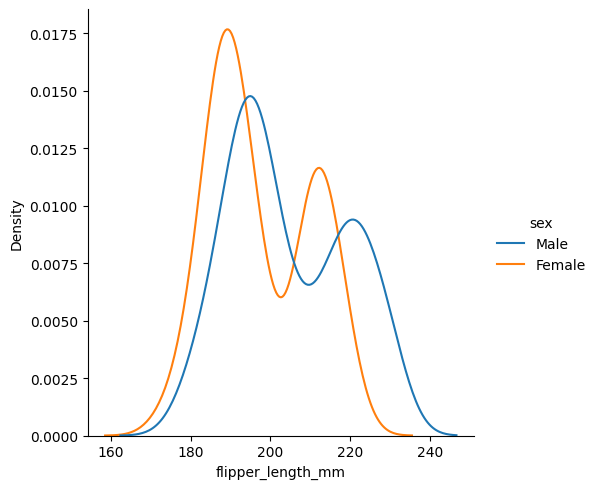

In [51]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", kind = 'kde')

### bivariate distributions

bivariate histograms can be create by simply specifying `y` in addition to `x`.
Use `cbar = True` to also generate a color bar.


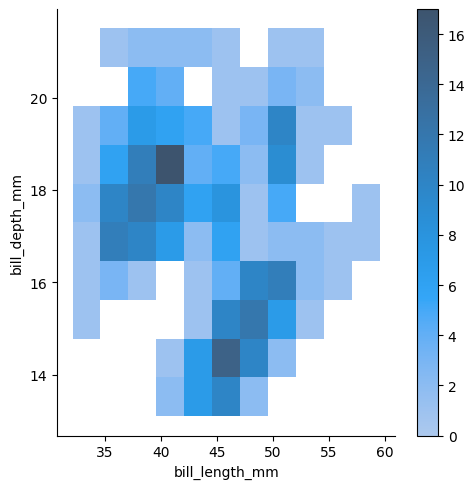

In [52]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", cbar = True)

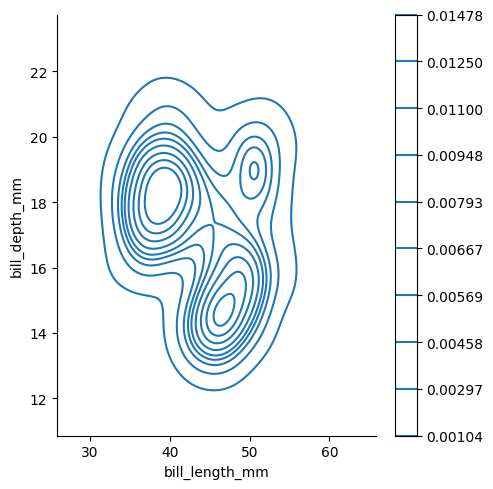

In [53]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", cbar = True, kind = 'kde')

### Visualizing categorical data
https://seaborn.pydata.org/tutorial/categorical.html 

Figure plot is `catplot`. The most useful plots are

- scatter plots
	- `stripplot`, `kind = 'strip'`
- distribution plots
	- `boxplot`
	- `violinplot`
- estimate plots
	- `barplot(estimator = 'mean')`




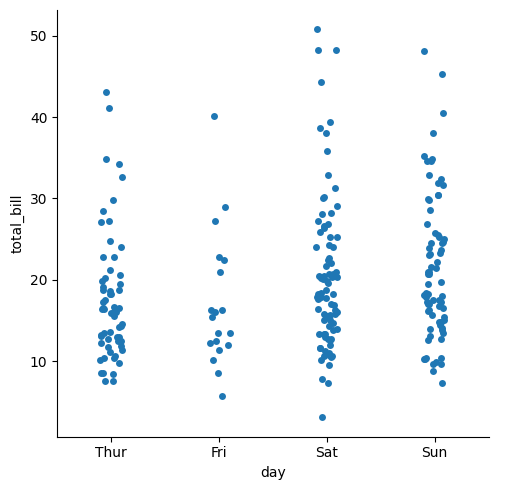

In [70]:
sns.catplot(data=tips, x="day", y="total_bill", kind = "strip")

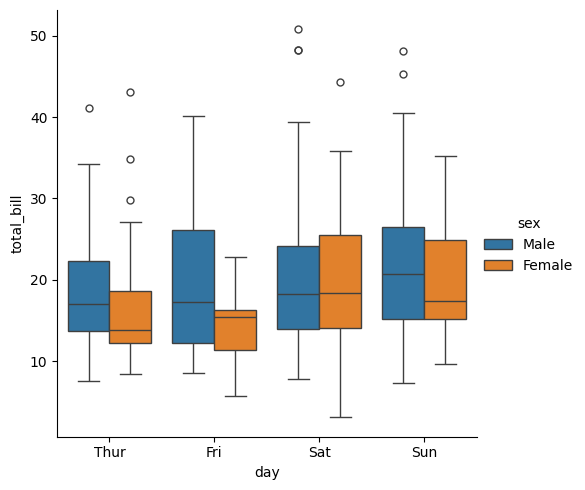

In [61]:
sns.catplot(data=tips, x="day", y="total_bill", hue = 'sex', kind = 'box')

The violinplot shows boxes like the boxplot, but also the kernel density estimate. 

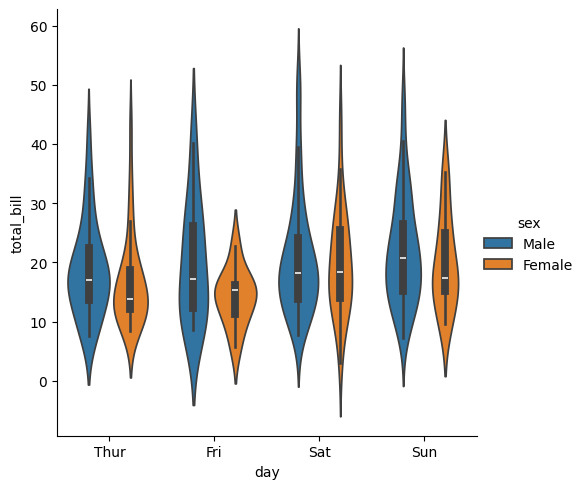

In [62]:
sns.catplot(data=tips, x="day", y="total_bill", kind = 'violin', hue = 'sex')

A barplot computes an estimate over categories. The default estimate is the mean. It also shows error bars, which can be configured again using `errorbar`.

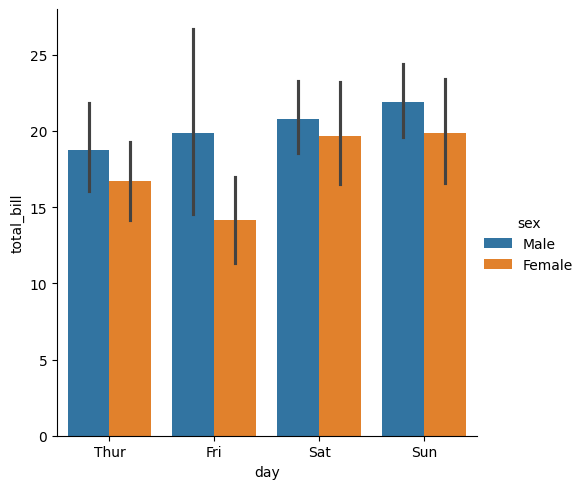

In [73]:
sns.catplot(data=tips, x = "day", y="total_bill", kind = 'bar', hue = 'sex', errorbar = ("ci", 95))

### Changing labels


The easiest way is to simply change the column names using `df.rename(columns = {oldname: newname, ...})`

Otherwise, for a single plot, we can set title and x- and y-label using

- `plt.title("title")`
- `plt.xlabel("Total bill")`
- `plt.ylabel("Tip")`

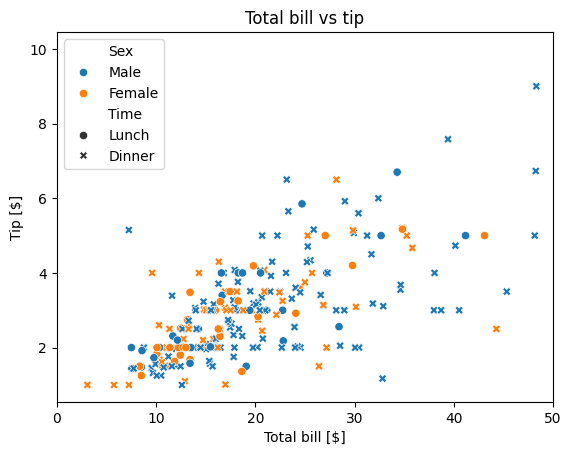

In [ ]:
sns.scatterplot(x="total_bill", y="tip", hue = "Sex", style = "Time", 
                data=tips.rename(columns={'sex': 'Sex', 'time': 'Time'}))
plt.title("Total bill vs tip")
plt.xlabel("Total bill [$]")
plt.ylabel("Tip [$]")
plt.xlim(0, 50)
plt.show()

For a figure plot / plot grid, one uses the following approach

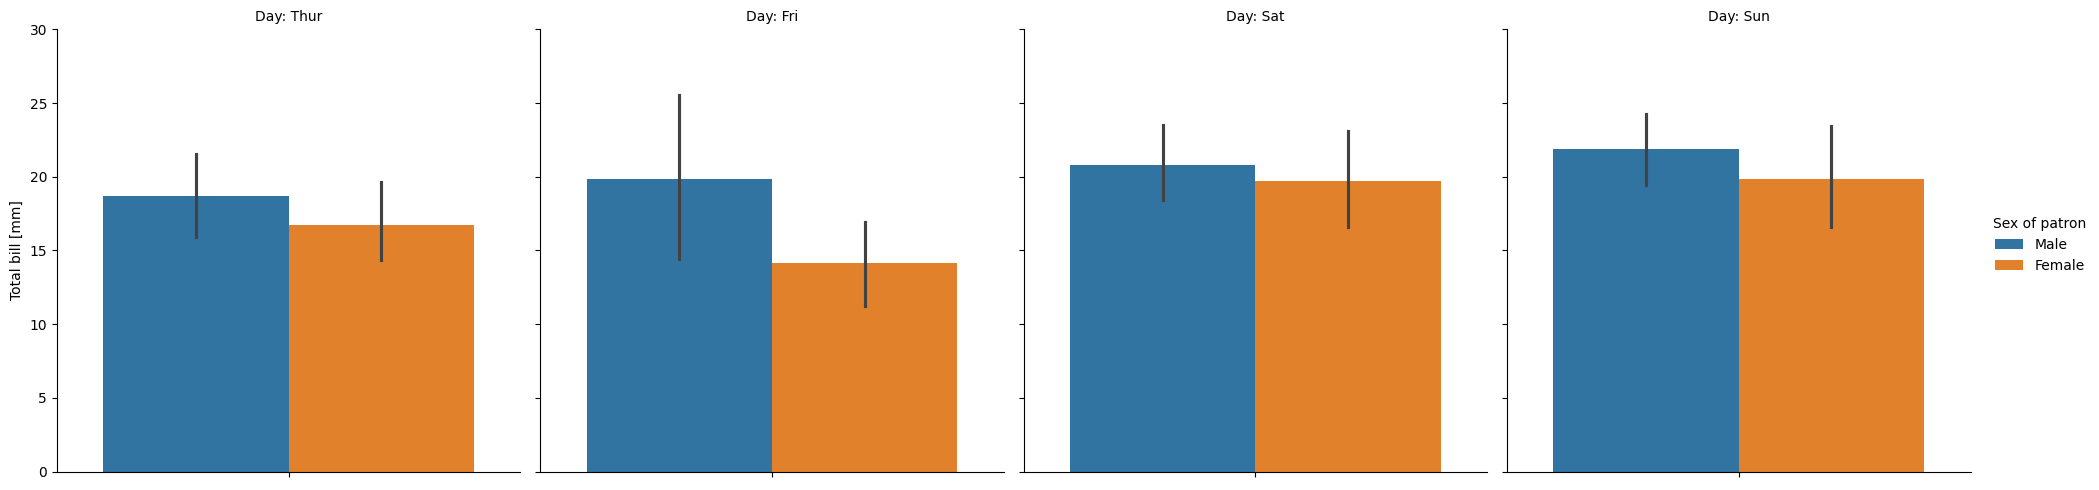

In [96]:
g = sns.catplot(data=tips.rename(columns={'sex': 'Sex of patron'}),
                col = "day", y="total_bill", kind = 'bar', hue = 'Sex of patron', errorbar = ("ci", 95))
g.set(ylim=(0, 30))
g.set(ylabel="Total bill [mm]")
g.set_titles("Day: {col_name}")
plt.show()
